# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

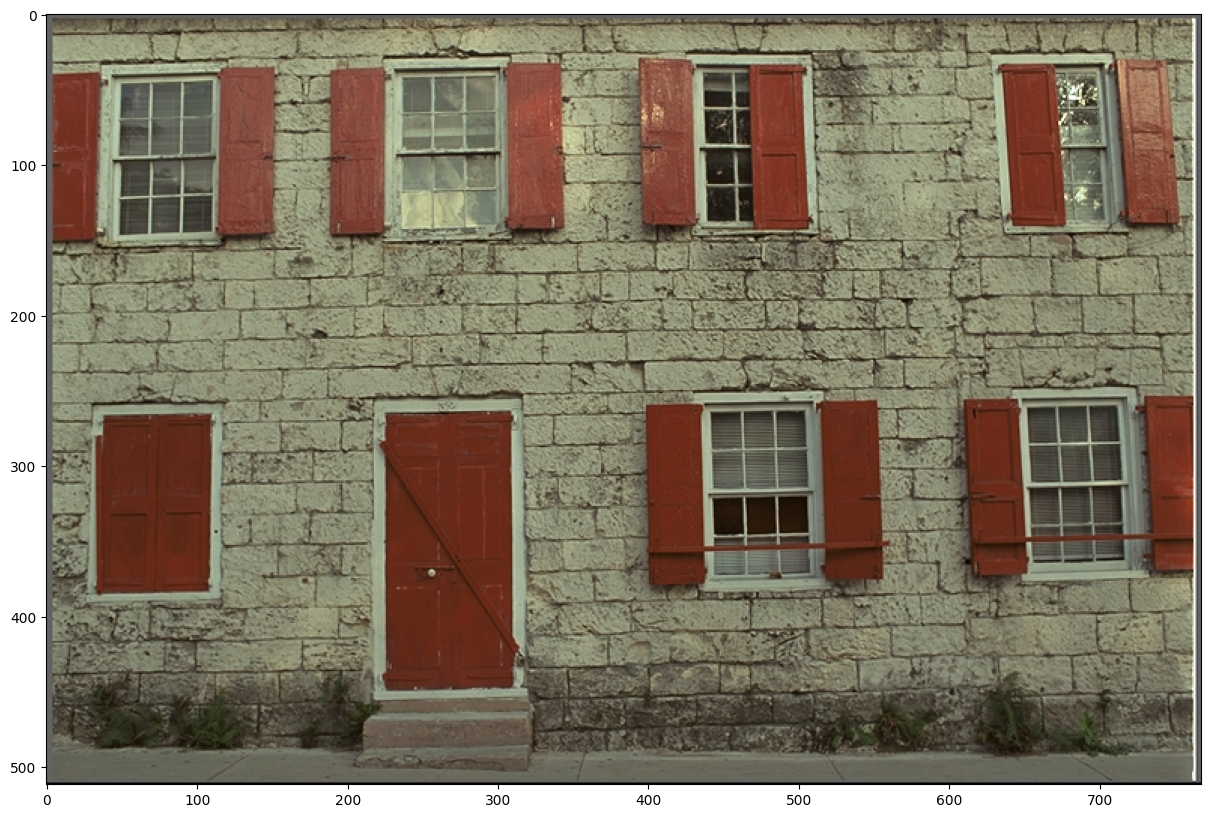

In [2]:
img = cv2.imread('./house.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

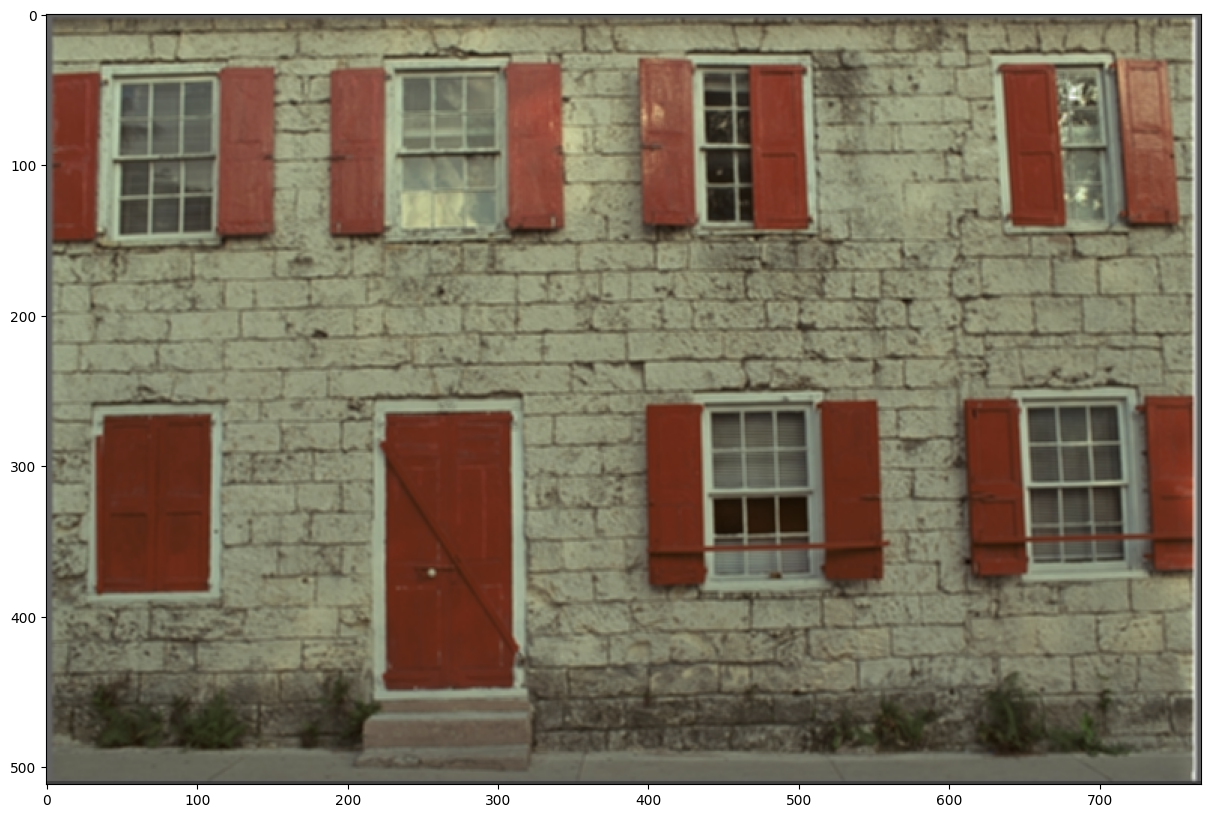

In [10]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=8)
plt.imshow(unsharp)

In [13]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)
print(diff)

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [ -1.  -1.  -1.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [ -1.  -1.   0.]
  ...
  [-11. -11. -11.]
  [  4.   4.   4.]
  [  0.   0.   0.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [-36. -36. -36.]
  [  6.   6.   6.]
  [  0.   0.   0.]]

 [[ 33.  33.  33.]
  [ 33.  33.  33.]
  [ 33.  33.  33.]
  ...
  [ 30.  30.  30.]
  [ 35.  35.  35.]
  [ 33.  33.  33.]]

 [[-66. -66. -66.]
  [-66. -66. -66.]
  [-66. -66. -66.]
  ...
  [-64. -64. -64.]
  [-66. -66. -66.]
  [-66. -66. -66.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  99.   99.   99.]
  [  99.   99.   99.]
  [  99.   99.   99.]
  ...
  [  99.   99.   99.]
  [  99.   99.   99.]
  [  99.   99.   99.]]

 [[  99.   99.   99.]
  [  99.   99.   99.]
  [  99.   99.   99.]
  ...
  [  89.   89.   89.]
  [  99.   99.   99.]
  [  99.   99.   99.]]

 [[  99.   99.   99.]
  [  99.   99.   99.]
  [  89.   89.   99.]
  ...
  [ -15.  -15.  -15.]
  [ 139.  139.  139.]
  [  99.   99.   99.]]

 ...

 [[  99.   99.   99.]
  [  99.   99.   99.]
  [  99.   99.   99.]
  ...
  [-284. -284. -284.]
  [ 160.  160.  160.]
  [  99.   99.   99.]]

 [[ 429.  429.  429.]
  [ 429.  429.  429.]
  [ 429.  429.  429.]
  ...
  [ 401.  401.  401.]
  [ 449.  449.  449.]
  [ 429.  429.  429.]]

 [[-660. -660. -660.]
  [-660. -660. -660.]
  [-660. -660. -660.]
  ...
  [-640. -640. -640.]
  [-660. -660. -660.]
  [-660. -660. -660.]]]


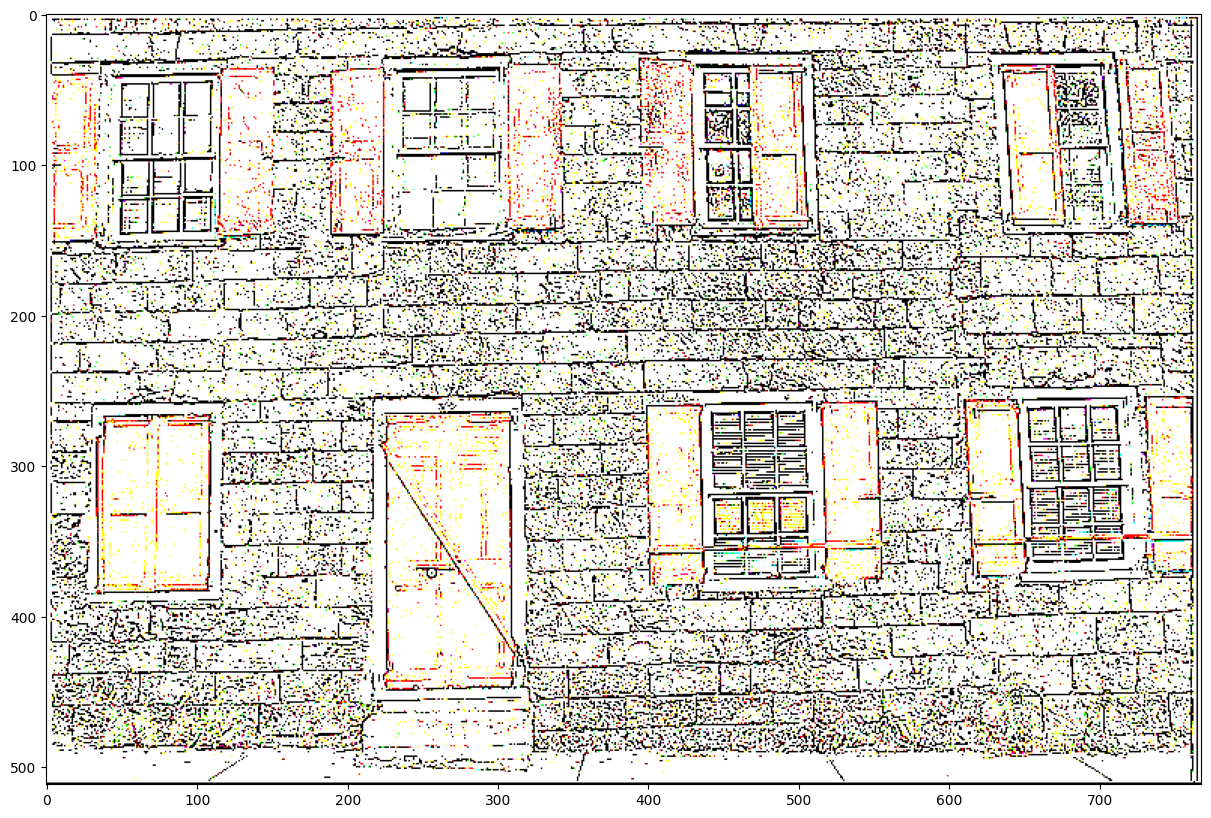

In [25]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 10
sharpened = img.astype(np.float32) + diff * amount
print(sharpened)
plt.imshow(sharpened)



### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?